### Lazy PSF tutorial

##### Cheat sheet on how to use lazypsf 

In [1]:
from lazypsf.r_psf import sample_flux, get_flux_dist, mag_dist, inject, write_mag
from astropy.io import fits
import matplotlib.pyplot as plt
import numpy as np

For a faster performance install pyfftw
 
 
 


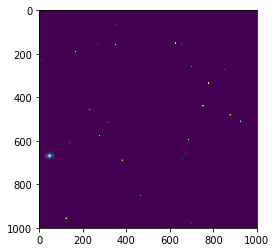

In [2]:
data = fits.getdata('test2_ref.fits')
plt.imshow(data[3000:4000, 4000:5000], vmin=1000, vmax=10000)
plt.show()

In [3]:
dist = get_flux_dist('test2_ref.fits') #distribution
print(' ')
print(' Probability  Minimum flux')
print(dist[1])
print('----------------------------')

Making flux distribution catalog
 
 Probability  Minimum flux
[1.153691e-01 3.361571e+04]
----------------------------


Random flux sample
28278


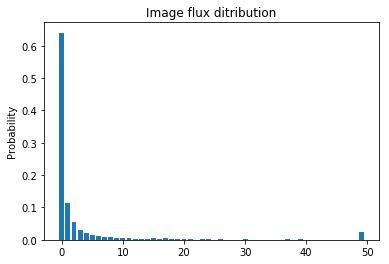

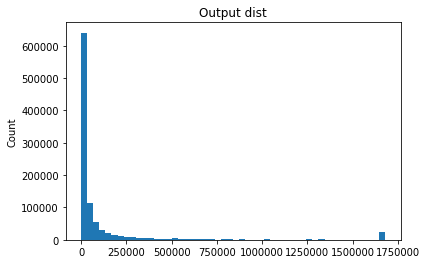

In [4]:
#proof of concept
flux = sample_flux(dist) #generates random flux from distibution
print('Random flux sample')
print(flux)

flux_dist = []
for _ in range(1000000):
    flux_dist.append(sample_flux(dist))
    
tmp_array=[]
for i in range(len(dist)):
    tmp_array.append(dist[i][0])

    
    
x = np.arange(len(dist))
plt.bar(x, height= tmp_array)
plt.ylabel('Probability')
plt.title('Image flux ditribution')
plt.savefig('hist1.png')
plt.show()

plt.hist(flux_dist, bins=50)
plt.title('Output dist')
plt.ylabel('Count')
plt.savefig('hist2.png')
plt.show()

In [5]:
#input (bright limit, lower limit, zero point)
dist = mag_dist(14,20) #distribution
print(' ')
print(' Probability  Minimum flux')
print(dist[1])
print('---------------------------------')

 
 Probability  Minimum flux
[2.00000000e-02 5.31429838e+05]
---------------------------------


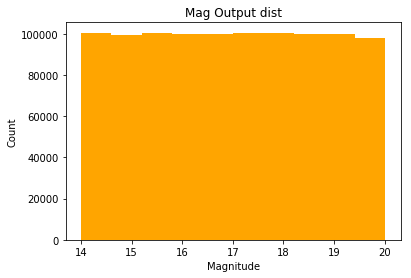

In [6]:
tmp_array=[]
for i in range(1000000):
    flux = sample_flux(dist)
    tmp_array.append(-2.5*np.log10(flux * 1.24*10**-3 * 30/(8.79*10**9)))
    
plt.hist(tmp_array, color='orange')
plt.title('Mag Output dist')
plt.ylabel('Count')
plt.xlabel('Magnitude')
plt.savefig('hist3.png')
plt.show()

Making PSF cat


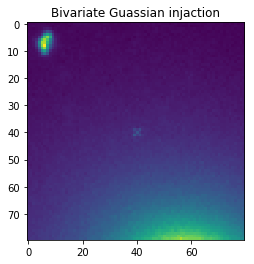

In [7]:
# Injects a fake source into the input image using either bivariate Guassian PSF_mod=0
# or PSFex PSF_mod=1

#input (image name, number of injected source, PSF_model)
image='test2_ref.fits'
inject(image, 1, 0, overwrite=True)

plt.imshow(fits.getdata('test.fits'))
plt.title('Bivariate Guassian injaction')
plt.savefig('BGinj.png')
plt.show()

Making PSF catalog
Modelling PSF for test2_ref.fits


/home/rc/anaconda3/lib/python3.6/site-packages/lazypsf/r_psf.py:396: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  psf_centre[ind] = psf_resized_norm


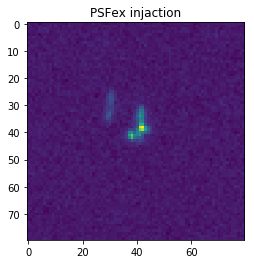

x, y, flux
730 5302 9000 

2464 7656 9000 

1914 575 9000 

4018 7166 9000 

2945 7275 9000 

Catalog format:
X, Y, Flux, Mag
730 5302 9000 18.548008564381373

2464 7656 9000 18.548008564381373

1914 575 9000 18.548008564381373

4018 7166 9000 18.548008564381373

2945 7275 9000 18.548008564381373



In [9]:
# you can also use a single integer to guarentee a value of the flux
# and use the write cat feature to build a catalo of injected sources
inject(image, 5, 1, flux_dist=9000, overwrite=True, write_cat = True)

plt.imshow(fits.getdata('test.fits'))
plt.title('PSFex injaction')
plt.savefig('PSinj.png')
plt.show()

print('x, y, flux')
for lin in open('injection.cat'):
    print(lin)
    
# and if you have the zero point add the mag value
write_mag()

for lin in open('mags.cat'):
    print(lin)
